In [1]:
import os
import io
import numpy as np
import platform
from PIL import ImageFont, ImageDraw, Image
import cv2
from google.cloud import vision
import matplotlib.pyplot as plt

In [2]:
def plt_imshow(title="image", img=None, figsize=(8, 5)):
    plt.figure(figsize=figsize)

    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []

            for i in range(len(img)):
                titles.append(title)

        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)

            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])

        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

In [3]:
def putText(image, text, x, y, color=(0, 255, 0), font_size=22):
    if type(image) == np.ndarray:
        color_coverted = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = Image.fromarray(color_coverted)

    if platform.system() == "Darwin":
        font = "AppleGothic.ttf"
    elif platform.system() == "Windows":
        font = "malgun.ttf"
    else:
        font = "NanumGothic.ttf"

    image_font = ImageFont.truetype(font, font_size)
    font = ImageFont.load_default()
    draw = ImageDraw.Draw(image)

    draw.text((x, y), text, font=image_font, fill=color)

    numpy_image = np.array(image)
    opencv_image = cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR)

    return opencv_image

In [4]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "../drugbox-service-account.json"

client_options = {"api_endpoint": "us-vision.googleapis.com"}
client = vision.ImageAnnotatorClient(client_options=client_options)

In [6]:
path = "../images/폐의약품_수거함.jpeg"
with io.open(path, "rb") as image_file:
    content = image_file.read()

In [7]:
image = vision.Image(content=content)

response = client.text_detection(image=image)
texts = response.text_annotations

In [9]:
texts

[locale: "ko"
description: "서울 내 손안에 서울\n폐의약품 수거함\n투입구\n밀어서 넣어주세요\nLLLLLE\n폐의약품 배출요령 ㄱ\n알약 / 가루약\n포장지 그대로\n개봉하지 말고 배출\n(겉 포장만 제거)\nSALER\n몰약/연고 등\n마개를\n잘 잠그고\n용기째 배출"
bounding_poly {
  vertices {
    x: 15
    y: 16
  }
  vertices {
    x: 611
    y: 16
  }
  vertices {
    x: 611
    y: 448
  }
  vertices {
    x: 15
    y: 448
  }
}
, description: "서울"
bounding_poly {
  vertices {
    x: 15
    y: 16
  }
  vertices {
    x: 34
    y: 16
  }
  vertices {
    x: 34
    y: 31
  }
  vertices {
    x: 15
    y: 31
  }
}
, description: "내"
bounding_poly {
  vertices {
    x: 41
    y: 16
  }
  vertices {
    x: 52
    y: 16
  }
  vertices {
    x: 52
    y: 31
  }
  vertices {
    x: 41
    y: 31
  }
}
, description: "손안에"
bounding_poly {
  vertices {
    x: 55
    y: 16
  }
  vertices {
    x: 88
    y: 16
  }
  vertices {
    x: 88
    y: 31
  }
  vertices {
    x: 55
    y: 31
  }
}
, description: "서울"
bounding_poly {
  vertices {
    x: 95
    y: 16
  }
  vertices {
    x: 126
    y: 1

In [10]:
len(texts)

45


"약정보 더보기
약품이미지
홍길동님 1/
1999
조재일 2021.04.21 조제약사 AdminTest
약품명/성분
복약안내 / 복약만료일 2021.04.26
하이포티어스플러스점안액 기업정주세요
포비돈 50mg/mL
세라딘캡슐
세프라딘수화물500mg
[일] 주황HIP CEFRADINE 500
세라딘캡슐
세프라딘수화물500mg
[HIP CERADive 500
가리온정10mg
11KL A Tong
INT FREY MEL IN F
리바로정1mg
W 피타바스타틴칼슘수화물 1,100mg
[하하201
세트락살플러스점이액
신흥로플록사신염산염수화물 348mg/ml
플루오지용용아세토니트6mg/m
아세트아미노펜과
교복용하세요~
아세트아미노펜과교복용가능한 부루펜시
*단, 멕시부프로펜과 교차용 불가
약제비 계산서·영수증(별지 제11호서식]
| 필독약국
영수증번호 20200409-001
환자 성명 홍길동
조일자 2021.04.21 공휴
약제비총액 ①+2+@
본인부담금 ①
보험자부담금 ②
(비급여(본인) ③
카 드
[안구건조증 치료가능한 콘택트렌즈의
삼가세요 다른 점안제 투여시 5분 이상 간격두세요.
위장장애 주의
[항생제] 증상개선시전문가와 상의없이 투약 중단
마세요 설사,간호조상승, 발진이 나타날 수 있어요.
위장장에 주의
[증상개선시전문가와 상의없이 중단
하세요 실시간상승, 발진이나타날 수 있어요
웅진기계식주의
[알러지질환] 졸음이 볼수있으므로 운전
기계조작시 주의하세요 이 약의 투여기간 동안에는
가능한 금주하세요
임신계획 시 주의 근육통주의
[고지혈증약] 투어때때로 근육통이 나타날 수
있습니다. 황달,간기능이상징후가 있을시전문가와
상화
발진주의
[귀염주의
귀약
귀약정이용으로만 사용하세요. 다른
동시에 사용하지 마세요.
과
FORLEANS
02-1234-1234
위치 투약량 횟수 일수
163
163
163
163
163
163
Samil
밀까부루펜
수납금액 현
Ⓒ
신분확인번호
현금승인번호
사업자등록번호
사업장소재지
호
명
상
금
1일
물약은
① 아침
③ 저녁
1234567890

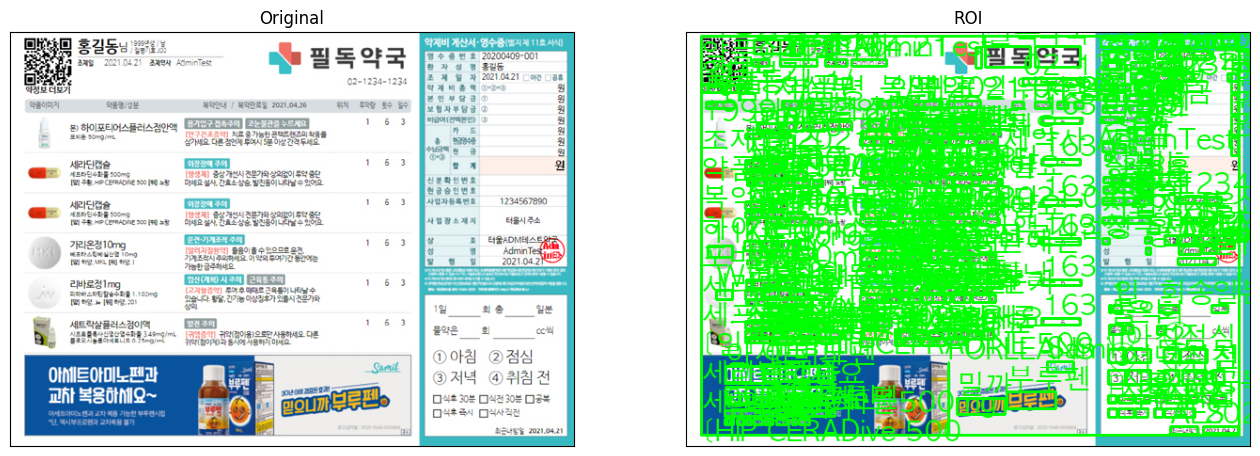

In [19]:
img = cv2.imread(path)
roi_img = img.copy()

for text in texts:
    print('\n"{}"'.format(text.description))

    vertices = ["({},{})".format(vertex.x, vertex.y) for vertex in text.bounding_poly.vertices]

    ocr_text = text.description
    x1 = text.bounding_poly.vertices[0].x
    y1 = text.bounding_poly.vertices[0].y
    x2 = text.bounding_poly.vertices[1].x
    y2 = text.bounding_poly.vertices[2].y

    cv2.rectangle(roi_img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    roi_img = putText(roi_img, ocr_text, x1, y1 - 30, font_size=30)

if response.error.message:
    raise Exception(
        "{}\nFor more info on error messages, check: "
        "https://cloud.google.com/apis/design/errors".format(response.error.message)
    )

plt_imshow(["Original", "ROI"], [img, roi_img], figsize=(16, 10))

In [22]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
import easyocr

reader = easyocr.Reader(["ko", "en"])  # this needs to run only once to load the model into memory
result = reader.readtext("../images/처방약_예시.jpeg")
print(result)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete[([[68, 4], [170, 4], [170, 30], [68, 30]], '총길동님 표-:', 0.04359036849124748), ([[439, 5], [591, 5], [591, 21], [439, 21]], '외지비거신서 영수히-기서기오 세세', 0.01813846895066386), ([[100, 30], [140, 30], [140, 38], [100, 38]], '2U2U: 2', 0.1239708952499507), ([[147, 29], [217, 29], [217, 41], [147, 41]], '소치유사 -rrles', 0.031816963980006725), ([[316, 14], [426, 14], [426, 46], [316, 46]], '필독약국', 0.8939129710197449), ([[440, 20], [488, 20], [488, 44], [440, 44]], '@ r량', 0.0029965578619018034), ([[499, 21], [565, 21], [565, 33], [499, 33]], '202004J9-001', 0.31370197478780865), ([[501, 33], [529, 33], [529, 45], [501, 45]], '$0등', 0.0037913524103602957), ([[357, 47], [425, 47], [425, 61], [357, 61]], '02-1234-1234', 0.2345628771900139), ([[499, 43], [587, 43], [587, 55], [499, 55]], '2021.0421 [어간 D8', 0.12026224853524604), ([[16, 58], [56, 58], [56, 66], [16, 66]], '미거나 내누', 0.03765751553498371), ([[444, 56], [474, 56], [

In [24]:
result[0]

([[68, 4], [170, 4], [170, 30], [68, 30]], '총길동님 표-:', 0.04359036849124748)

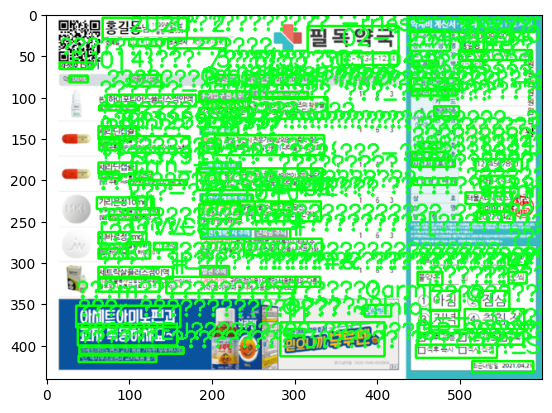

In [25]:
import cv2


def draw_bounding_boxes(image_path, result):
    # 이미지 파일 로드
    image = cv2.imread(image_path)
    for res in result:
        coordinates, text, _ = res
        # 좌표 추출
        top_left = tuple(coordinates[0])
        bottom_right = tuple(coordinates[2])
        # 이미지에 박스 그리기
        cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
        # 박스 위에 텍스트 표시
        cv2.putText(image, text, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # 이미지 표시
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()


# 사용 예
draw_bounding_boxes("../images/처방약_예시.jpeg", result)


"약제비 계산서·영수증 (11호서식]
도약할수
자성명품
조일자 2018-03-16
약제비총액 1+2+3)
보험지부담금2
ORTENKER
카 S
총수납금액 현금영수증
계
현금영수증 신분확인번호
본금승인번호
a
R
849 603-08-17723
부산시 금정구 중앙대로
사업장소재지 1841번길 15(구서동)
상 호메디칼영성약국
2014 BITKA ZA 30 DA
shink
조정
영조정 향 향인
that+See Bar anv
통사현정
야간 공휴
13,310
3,900
9,410
DAS
유상봉투갈 20원
품목
클레마신청
레보코나진정
삼남아세트아미노
스피부진정
3,900
3,900
05
원
원
원
투약량 횟수 일수 총
133
123
23
1 33
..........
-------
⑦ 조제약 복약안내 (다음내방일 : 2018-03-19(월)
조정향
환자정보의
교부번호:
병원정보: 부산하나이비인후과의원장혁진) Tel. 513-7570
약품사진
약품명
록사편
흰색의 원형 정제
클래마신정
레보코나진정
흰색 또는 미황색의
타원형 필름코팅정
스파부틴정
흰색의 원형정제이다.
복약안내(투약량/횟수/일수)
비스테로이드성 소염진통제
해열,소염(염증 완화) 진통제
삼남아세트아미노펜 [기타 진통제
백색의 장방형 정제
해열, 진통제
E
조제약사 :
조제일자 : 2018-03-16
[마크로라이드계 항생제]
마크로라이드계 항생제 세균에 의한
각종 감염증 치료 헬리코박터 파이로리
[항히스타민 & 항알러지약 1
항히스타민제 항알레르기 고조열,
비염, 아토피, 가려움, 두드러기 등..
[위장운동조절 및 진경제 1
진경제 : 대장의 경력
정희3회 3일분
기밀용기
실온보관(1-30℃)
1정씩 2회 3일분
0.5점씩 2회 3일분
차광기밀용기
실온(1~30℃)보관
1정식3회 3일분
차광기밀용기,
실온(1~30℃)보관
1정식3회 3일분
밀폐용기,
실온(1~30℃)보관
주의사항
On
치발기준
#
중음
516
잠잘때
음주금지
AK
ED
양운동을 음주금지
오초민_소소한 소비들
http://ochomin.tistor

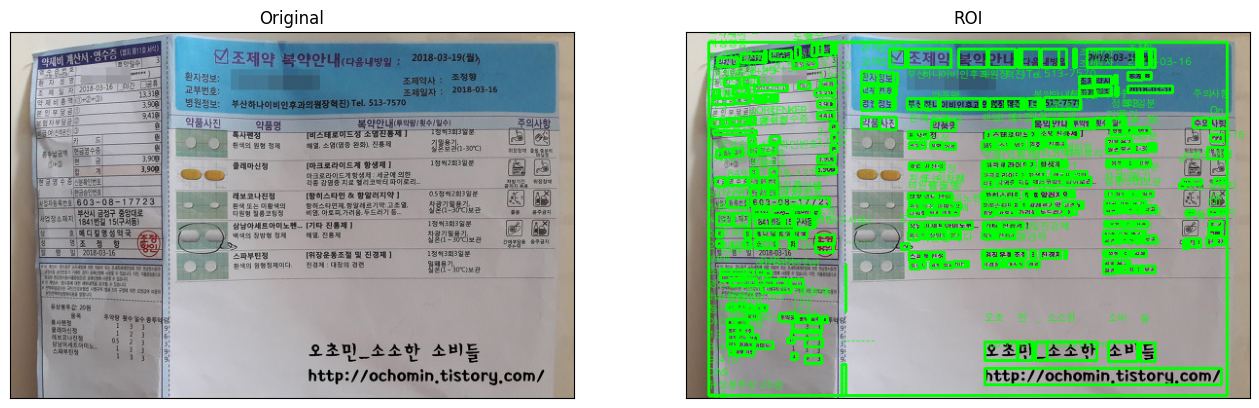

In [13]:
import re
path = "../images/script.jpeg"

with io.open(path, "rb") as image_file:
    content = image_file.read()
image = vision.Image(content=content)

response = client.text_detection(image=image)
texts = response.text_annotations
img = cv2.imread(path)
roi_img = img.copy()

for text in texts:
    if  not (re.search("(정|캡슐)$", text.description)) or len(text.description) > 10 :
        continue
    print('\n"{}"'.format(text.description))

    vertices = ["({},{})".format(vertex.x, vertex.y) for vertex in text.bounding_poly.vertices]

    ocr_text = text.description
    x1 = text.bounding_poly.vertices[0].x
    y1 = text.bounding_poly.vertices[0].y
    x2 = text.bounding_poly.vertices[1].x
    y2 = text.bounding_poly.vertices[2].y

    cv2.rectangle(roi_img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    roi_img = putText(roi_img, ocr_text, x1, y1 - 30, font_size=10)

if response.error.message:
    raise Exception(
        "{}\nFor more info on error messages, check: "
        "https://cloud.google.com/apis/design/errors".format(response.error.message)
    )

plt_imshow(["Original", "ROI"], [img, roi_img], figsize=(16, 10))

## 수거함 확인

In [27]:
!pip install rich

  Obtaining dependency information for rich from https://files.pythonhosted.org/packages/be/be/1520178fa01eabe014b16e72a952b9f900631142ccd03dc36cf93e30c1ce/rich-13.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for markdown-it-py>=2.2.0 from https://files.pythonhosted.org/packages/42/d7/1ec15b46af6af88f19b8e5ffea08fa375d433c998b8a7639e76935c14f1f/markdown_it_py-3.0.0-py3-none-any.whl.metadata
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl (10.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 1.0 MB/s eta 0:00:00a 0:00:01m
Using cached markdown_it_py-3.0.0-py3-none-any.whl (87 kB)

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [31]:
from rich import print as pp
for text in texts:
    if "수거" in text.description and len(text.description) < 10:
        pp(type(text))
        pp(text,text.description)
        pp(f"Len : {len(text.description)}")

<class 'google.cloud.vision_v1.types.image_annotator.EntityAnnotation'>

description: "수거함"
bounding_poly {
  vertices {
    x: 464
    y: 66
  }
  vertices {
    x: 611
    y: 66
  }
  vertices {
    x: 611
    y: 108
  }
  vertices {
    x: 464
    y: 108
  }
}
 수거함

Len : 3

In [17]:
texts[0].description

'서울 내 손안에 서울\n폐의약품 수거함\n투입구\n밀어서 넣어주세요\nLLLLLE\n폐의약품 배출요령 ㄱ\n알약 / 가루약\n포장지 그대로\n개봉하지 말고 배출\n(겉 포장만 제거)\nSALER\n몰약/연고 등\n마개를\n잘 잠그고\n용기째 배출'


"수거함"


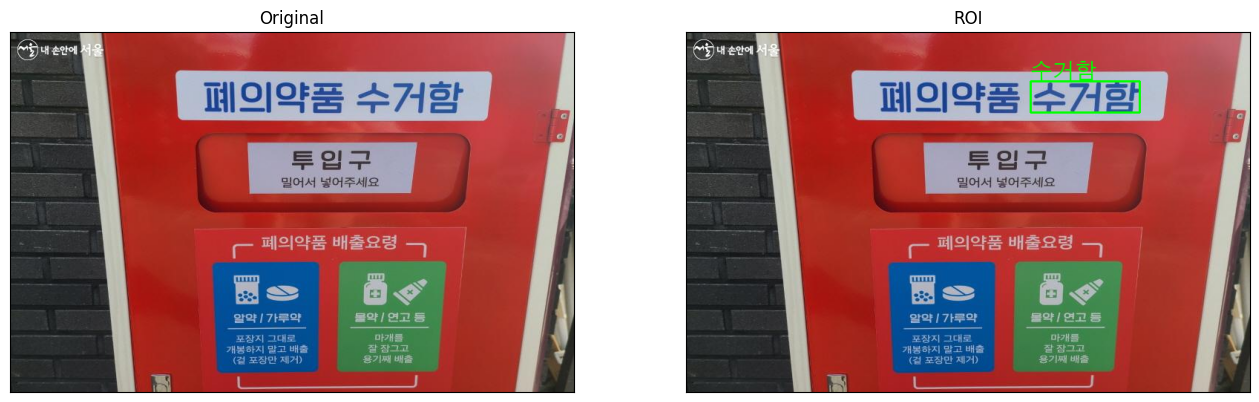

In [34]:
img = cv2.imread(path)
roi_img = img.copy()

for text in texts:
    if "수거" not in text.description or len(text.description) > 10:
        continue
    print('\n"{}"'.format(text.description))

    vertices = ["({},{})".format(vertex.x, vertex.y) for vertex in text.bounding_poly.vertices]

    ocr_text = text.description
    x1 = text.bounding_poly.vertices[0].x
    y1 = text.bounding_poly.vertices[0].y
    x2 = text.bounding_poly.vertices[1].x
    y2 = text.bounding_poly.vertices[2].y

    cv2.rectangle(roi_img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
    roi_img = putText(roi_img, ocr_text, x1, y1 - 30, font_size=30)

if response.error.message:
    raise Exception(
        "{}\nFor more info on error messages, check: "
        "https://cloud.google.com/apis/design/errors".format(response.error.message)
    )

plt_imshow(["Original", "ROI"], [img, roi_img], figsize=(16, 10))

In [5]:
def is_disposal_box(img_path,response,texts):
    img = cv2.imread(img_path)
    roi_img = img.copy()
    disposal_box_flag = False
    for text in texts:
        if "수거" not in text.description or len(text.description) > 10:
            disposal_box_flag = False
            continue
        else:
            disposal_box_flag = True
            print('\n"{}"'.format(text.description))

            vertices = ["({},{})".format(vertex.x, vertex.y) for vertex in text.bounding_poly.vertices]

            ocr_text = text.description
            x1 = text.bounding_poly.vertices[0].x
            y1 = text.bounding_poly.vertices[0].y
            x2 = text.bounding_poly.vertices[1].x
            y2 = text.bounding_poly.vertices[2].y

            cv2.rectangle(roi_img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            roi_img = putText(roi_img, ocr_text, x1, y1 - 30, font_size=30)
            
            break

    if response.error.message:
        raise Exception(
            "{}\nFor more info on error messages, check: "
            "https://cloud.google.com/apis/design/errors".format(response.error.message)
        )

    
    if disposal_box_flag:
        return roi_img,True
    else:
        print("수거함이 아닙니다!!!")
        return img,False

In [7]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/Users/jun/Development/AI-MLDL/drugbox-service-account.json"
client = vision.ImageAnnotatorClient()

img_path = "/Users/jun/Development/AI-MLDL/images/disposal_box.jpeg"
with io.open(img_path, "rb") as image_file:
    content = image_file.read()
image = vision.Image(content=content)
response = client.text_detection(image=image)
texts = response.text_annotations
roi_img, is_disposal = is_disposal_box(img_path, response, texts)
if is_disposal:
    print("It is right Disposal Box")
    plt_imshow(["Original", "ROI"], [img, roi_img], figsize=(16, 10))


Text : 서울 내 손안에 서울
폐의약품 수거함
투입구
밀어서 넣어주세요
LLLLLE
폐의약품 배출요령 ㄱ
알약 / 가루약
포장지 그대로
개봉하지 말고 배출
(겉 포장만 제거)
SALER
몰약/연고 등
마개를
잘 잠그고
용기째 배출
Text : 서울
Text : 내
Text : 손안에
Text : 서울
Text : 폐
Text : 의약품

"수거함"


NameError: name 'putText' is not defined